In [12]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'detecciones_26_11.xlsx - Sheet1.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Function to count tags in a JSON-like column
def count_tags(json_data):
    try:
        json_data = ast.literal_eval(json_data)
        if isinstance(json_data, dict):
            json_data = [json_data]
        return len(json_data)
    except (ValueError, SyntaxError, TypeError):
        return 0

# Apply the function to each angle column and calculate the total tags
for angle in ['Angle_0', 'Angle_90', 'Angle_180', 'Angle_270']:
    data[angle + '_count'] = data[angle].apply(count_tags)
data['total_tags'] = data[['Angle_0_count', 'Angle_90_count', 'Angle_180_count', 'Angle_270_count']].sum(axis=1)


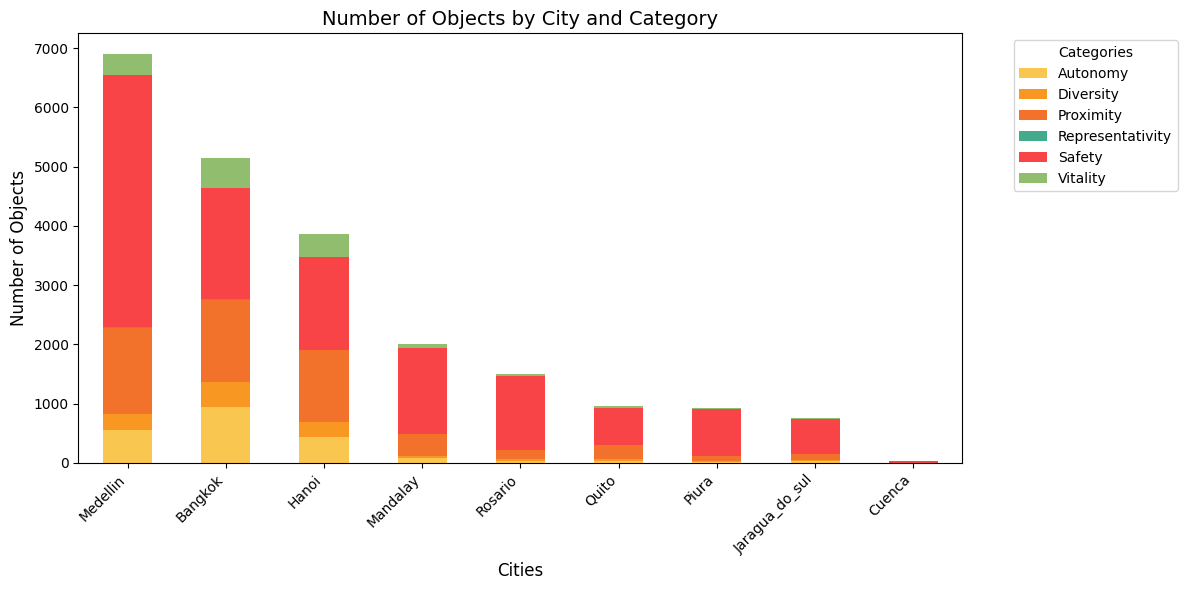

In [13]:
# Group data by city and category
category_city_counts = data.groupby(['city', 'category'])['total_tags'].sum().unstack(fill_value=0)

# Capitalize city names and category names
category_city_counts.index = category_city_counts.index.str.capitalize()
category_city_counts.columns = [col.capitalize() for col in category_city_counts.columns]

# Define the corrected color mapping for categories
image_color_map = {
    'Representativity': '#43AA8B',
    'Diversity': '#F89722',
    'Vitality': '#90BE6E',
    'Autonomy': '#F9C74F',
    'Proximity': '#F2712B',
    'Safety': '#F94447',
}

# Calculate the total number of objects per city
city_totals = category_city_counts.sum(axis=1).sort_values(ascending=False)

# Reorder the category_city_counts DataFrame based on city_totals
category_city_counts = category_city_counts.loc[city_totals.index]

# Plot the city-wise stacked bar chart
colors = [image_color_map[cat] for cat in category_city_counts.columns]
category_city_counts.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=colors
)
plt.title('Number of Objects by City and Category', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Number of Objects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

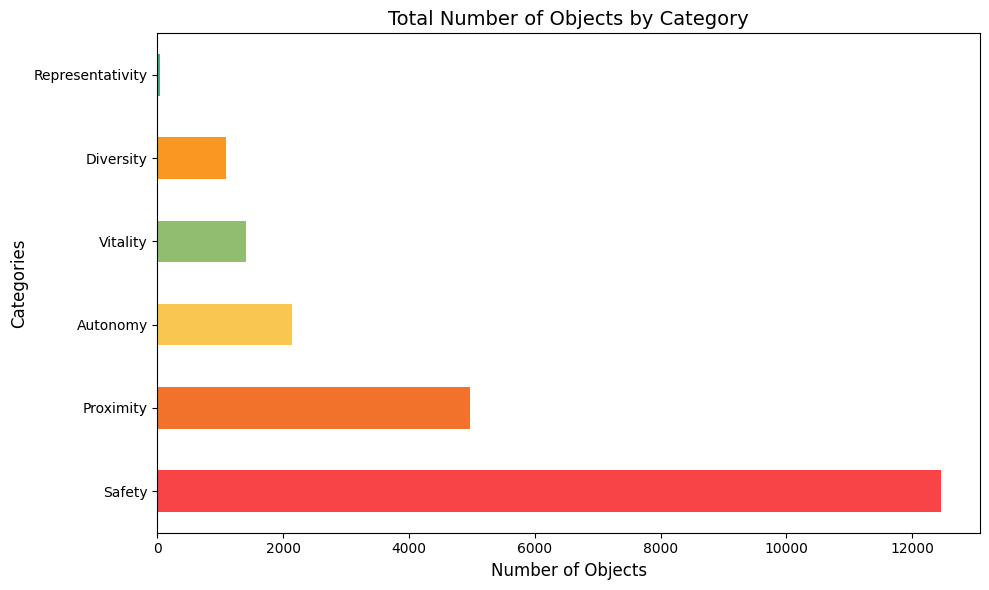

In [14]:
# Calculate the total number of objects per category
total_per_category = category_city_counts.sum(axis=0)

# Plot the category-wise horizontal bar chart in ascending order
plt.figure(figsize=(10, 6))
total_per_category.sort_values(ascending=True).plot(
    kind='barh', color=[image_color_map[cat] for cat in total_per_category.sort_values(ascending=True).index]
)
plt.title('Total Number of Objects by Category', fontsize=14)
plt.xlabel('Number of Objects', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.gca().invert_yaxis()  # To place safety at the bottom
plt.tight_layout()
plt.show()

# Save the processed dataset with total tags
data.to_csv('processed_dataset.csv', index=False)


In [15]:
# Generate text summaries for detections by city and category
city_summary = []
for city in category_city_counts.index:
    city_summary.append(f"City: {city}")
    city_total = city_totals[city]
    for category in category_city_counts.columns:
        category_total = category_city_counts.loc[city, category]
        percentage = (category_total / city_total) * 100
        city_summary.append(f"  {category}: {category_total} detections ({percentage:.2f}%)")
    city_summary.append("")

category_summary = []
total_detections = total_per_category.sum()
for category in total_per_category.index:
    category_total = total_per_category[category]
    percentage = (category_total / total_detections) * 100
    category_summary.append(f"{category}: {category_total} detections ({percentage:.2f}%)")

# Print summaries
print("\nCity-Wise Summary:\n")
print("\n".join(city_summary))

print("\nCategory-Wise Summary:\n")
print("\n".join(category_summary))


City-Wise Summary:

City: Medellin
  Autonomy: 558 detections (8.08%)
  Diversity: 267 detections (3.87%)
  Proximity: 1452 detections (21.03%)
  Representativity: 10 detections (0.14%)
  Safety: 4254 detections (61.62%)
  Vitality: 363 detections (5.26%)

City: Bangkok
  Autonomy: 942 detections (18.32%)
  Diversity: 421 detections (8.19%)
  Proximity: 1388 detections (27.00%)
  Representativity: 18 detections (0.35%)
  Safety: 1867 detections (36.32%)
  Vitality: 505 detections (9.82%)

City: Hanoi
  Autonomy: 438 detections (11.34%)
  Diversity: 252 detections (6.53%)
  Proximity: 1208 detections (31.28%)
  Representativity: 3 detections (0.08%)
  Safety: 1568 detections (40.60%)
  Vitality: 393 detections (10.18%)

City: Mandalay
  Autonomy: 81 detections (4.03%)
  Diversity: 41 detections (2.04%)
  Proximity: 364 detections (18.12%)
  Representativity: 0 detections (0.00%)
  Safety: 1451 detections (72.22%)
  Vitality: 72 detections (3.58%)

City: Rosario
  Autonomy: 39 detection